In [2]:
import os
import numpy as np
import pandas as pd
from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
from hough import *
from conformal_map import *
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
import tensorflow as tf

%matplotlib inline

In [181]:
import random

train_X = []
train_Y = np.zeros((N, 2, 2))
dims = 50
N = 10000
for i in range(N):
    image = np.zeros((dims, dims))
    nr_lines = 2
    for j in range(nr_lines):
        k = random.uniform(-1, 1)
        m = random.uniform(0, dims)
        train_Y[i, j] = np.array([k, m])
        for x in range(dims):
            y = k * x + m
            if 0 <= int(y) < dims:
                image[x, int(y)] = 1
    #for j in range(len(train_Y[-1]), 20):
    #    train_Y[-1].append([-1, -1])
    train_X.append(image)
    train_Y[-1] = np.array(train_Y[-1])
    
train_X = np.reshape(train_X, (N, dims, dims, 1))
train_Y = np.reshape(train_Y, (N, 2, 2))
for i in range(N):
    for j in range(2):
        train_Y[i, j, 1] /= dims

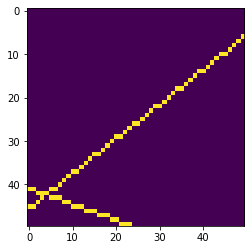

In [182]:
plt.imshow(train_X[512].T.reshape((dims, dims)))

In [198]:
def build_model():
    model = Sequential() 
    model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(dims, dims, 1)))
    model.add(layers:)
    model.add(layers.Conv2D(32, (3, 3), activation="relu"))
    model.add(layers.Flatten())
    model.add(layers.Dense(20))
    model.add(layers.RepeatVector(2))
    model.add(layers.LSTM(2, return_sequences=True))
    model.compile(loss='mae', optimizer='adam')
    return model

In [199]:
model = build_model()

In [200]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
flatten_15 (Flatten)         (None, 67712)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 400)               27085200  
_________________________________________________________________
repeat_vector_14 (RepeatVect (None, 2, 400)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 2, 2)              3224      
Total params: 27,097,992
Trainable params: 27,097,992
Non-trainable params: 0
_________________________________________

In [201]:
example_batch = train_X[:20]
example_result = model.predict(example_batch)
print(example_result[6])
print(train_Y[6])

[[-0.0054436  -0.0143396 ]
 [-0.01153168 -0.02328167]]
[[-0.87292274  0.73180593]
 [ 0.20660614  0.94595338]]


In [ ]:
EPOCHS = 50
print(train_X.shape)
print(train_Y.shape)
history = model.fit(train_X, train_Y, batch_size=32, validation_split=0.1, epochs=EPOCHS)

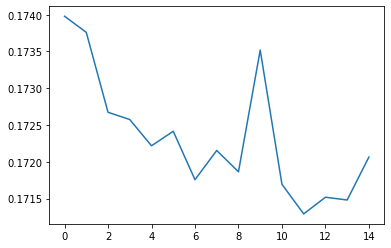

In [162]:
plt.plot(history.history['val_loss'])

In [163]:
print(train_X.shape)
prediction = model.predict(train_X)
#print(prediction - train_Y)
print(prediction[5])
print(train_Y[5])

(10000, 50, 50, 1)
[[0.64091945 0.23318224]
 [0.6826384  0.2201233 ]]
[[0.87314654 0.47003618]
 [0.23411753 0.10014761]]


In [82]:
k = random.uniform(0, 1)
m = random.uniform(0, 1)
image = np.zeros((dims, dims))
for x in range(dims):
    y = k * x + m
    image[x, int(y)] = 1
    
predicted_params = model.predict(np.array([np.reshape(image, (dims, dims, 1))]))
print(predicted_params)

[[[nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]]]


## Real line

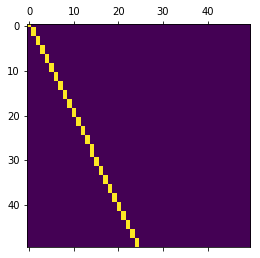

In [75]:
plt.matshow(image)
plt.show()

## Predicted line


In [76]:
predicted_image = np.zeros((dims, dims))
for x in range(dims):
    y = predicted_params[0][0] * x + predicted_params[0][1]
    predicted_image[x, int(y)] = 1
plt.matshow(predicted_image)
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

In [174]:
print("Equation predicted from neural network:", "y =", str(k) + "x", "+", m)

Equation predicted from neural network: y = 0.41867995022983684x + 0.673239055540219
